# INFO371 Lab: Cross-sectional and Before-after estimator

## Instructions

Please submit your jupyter notebooks (.ipynb files) with your answers. 

Please do not just provide computer output.  Always comment on your
main findings.  Also limit your output: do not submit pages and pages of
whatever your code spits out.

Working together is fun and useful but you have to submit your own
work.  Discussing the solutions and problems with your classmates is
all right but do not copy-paste their solution!  Please list all your
collaborators below:

* Name: Henry Ramstad
* ...

---
# Was Montana Meth Prevention Project Effective?

Your task is to determine if Montana Meth Prevention Project (MMP) was
effective in decreasing the methamphetamine use among Montana teens.

### Background and Data
Montana state conducted an agressive ad campaign in 2006 to decrease the
meth abuse by the youth.  

Your task is to analyze the efficacy of the campaign using Youth Risk
Behavior Survey (YRBS) data.  You will implement a) cross-sectional estimator, and b) before-after estimator.  The sample necessary for this lab is on canvas.  The full data and documentation can be obtained from [here](https://www.cdc.gov/healthyyouth/data/yrbs/data.htm).

The variables in the sample are:
* year -- survey year (2003-2009)
* age -- age, 14-17 years
* sex -- M,F
* meth -- 1 = has used methamphetamines in life
* tv -- 1 = watches more than 1hr TV on average schoolday (a large
  number of the project ads were displayed on TV).
* state -- MT = Montana, XX = national sample

An overview of what the dataframe looks like can be seen in the table generated by the code below: 

In [3]:
#this code loads in the dataset and shows you a brief overview of what the dataset looks like

import pandas as pd

df = pd.read_csv('yrbs.tsv', sep='\t', header=0)
df

,year,age,sex,meth,tv,state
0,2003,13,M,0,1,XX
1,2003,13,M,1,1,XX
2,2003,13,M,1,1,XX
3,2003,13,M,0,1,XX
4,2003,13,M,0,0,XX
...,...,...,...,...,...,...
58072,2009,17,F,0,0,MT
58073,2009,17,F,0,0,MT
58074,2009,17,F,0,0,MT
58075,2009,17,F,0,0,MT


And here is how the average meth use data looks on a graph for different years and states:

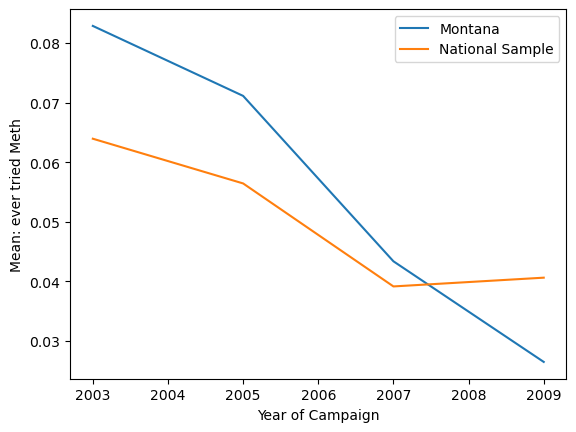

In [4]:
import matplotlib.pyplot as plt

#this line does a groupby and summarize
group_df = df.groupby(["year", "state"]).agg({'meth': "mean"})

group_df.unstack().plot(xlabel = "Year of Campaign", ylabel = "Mean: ever tried Meth")
plt.legend(["Montana", "National Sample"])

---
## Cross-Sectional Estimator

If the project had an effect, Montana should have lower rate of meth use after the campaign ended.  
Now compare the meth use (mean value) in Montana and nationally after the project.  Interpret the most important outcomes, and compare the results for all three approaches.


1. Load the data
2. In this data, what is outcome, what is treatment?
3. Do it as a simple table: compare the average post-project meth use in MT and nationally.
    * Hint: consider creating an auxiliary variable ''after''.
    * Hint 2: the result should be `-0.0018`.
4. Why should you compare only the post-project years here?
5. Do it using regression without any other controls. You should get exactly the same result.
6. Interpret the result: what does the number mean?  (You should have gotten 0.0018.)  Is it statistically significant?
7. What is the identifying assumption for this approach?  Do you think this is credible?

In [5]:
#code goes here -- feel free to use more cells 
df_mt = df[df.state == 'MT']
df_xx = df[df.state == 'XX']
df_mt_post = df_mt[df_mt.year > 2005]
df_xx_post = df_xx[df_xx.year > 2005]
post_mean_mt = df_mt_post.meth.mean()
post_mean_xx = df_xx_post.meth.mean()
diff = post_mean_mt - post_mean_xx
print(diff)
import numpy as np
import statsmodels.formula.api as smf
df_post = df[df.year > 2005]
model = smf.ols(formula='meth ~ state', data=df_post).fit()
print(model.summary())


-0.001807976101252995
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Sat, 20 Apr 2024   Prob (F-statistic):              0.554
Time:                        19:03:10   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0381      

The outcome is meth usage and the treatment is the time pre and post ad campaign.

Comparing post project years ensures that the effects of the difference can be attributed to only the campaign.

The results of the regression indicate that the difference between MT and XX in meth use after 2005 is 0.0018 but since the T value >> 0.05 it is statistically insignificant between national and state averages for meth use after the campaign.

The assumption made in this analysis is that the campaign was the only factor which influenced meth usage. Additionally it assumes that meth use was stable in non-MT states pre and post campaign.


---
## Before-After Estimator

Alternatively, if the campaign had any effect, it should have decreased the methamphetamine use in Montana.  Let's compare the meth use (mean value) in Montana before and after the campaign.  In each case interpret the most important outcomes, and
compare the results for all three approaches.

1. Do it as a simple table: just present the average meth use in MT before and after the campaign.
    * Hint: you have to focus on a single state only (which?).  
2. Do it using regression without any other controls (no age, sex, tv).
3. Interpret the results.  What does the number you get (you should get `-0.0386`) mean?  Is it statistically significant?
4. What is the identifying assumption for this approach?
5. Compare the identifying assumption for CS and BA estimators. Which one do you find more convincing?


In [6]:
#code goes here -- feel free to use more cells 
df_mt = df[df.state == 'MT']
df_mt_post = df_mt[df_mt.year > 2005]
df_mt_pre = df_mt[df_mt.year < 2006]
post_mean_mt = df_mt_post.meth.mean()
pre_mean_mt = df_mt_pre.meth.mean()
print("post ad campaign:", post_mean_mt)
print("pre ad campaign:", pre_mean_mt)
diff = post_mean_mt - pre_mean_mt
print(diff)

post ad campaign: 0.038114754098360654
pre ad campaign: 0.07673368896183833
-0.03861893486347767


In [7]:
import statsmodels.api as sm
df_mt_pre = df_mt[df_mt.year < 2006].copy()
df_mt_post = df_mt[df_mt.year > 2005].copy()
df_mt_pre['after'] = 0
df_mt_post['after'] = 1
df_mt_did = pd.concat([df_mt_pre, df_mt_post])
print(df_mt_did)
model_did = sm.OLS(df_mt_did.meth, 
                   sm.add_constant(df_mt_did[['after']]))
results_did = model_did.fit()
print(results_did.summary())

       year  age sex  meth  tv state  after
48323  2003   13   M     0   1    MT      0
48324  2003   13   M     1   0    MT      0
48325  2003   14   M     1   1    MT      0
48326  2003   14   M     0   0    MT      0
48327  2003   14   M     0   1    MT      0
...     ...  ...  ..   ...  ..   ...    ...
58072  2009   17   F     0   0    MT      1
58073  2009   17   F     0   0    MT      1
58074  2009   17   F     0   0    MT      1
58075  2009   17   F     0   0    MT      1
58076  2009   17   F     0   0    MT      1

[9754 rows x 7 columns]
                            OLS Regression Results                            
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           2.19e-16
Time:                        19:03:14   Log-Likeliho

Using a simple table the difference between post and pre meth use in MT is -0.0386. Additionally we can see that the regression DID returns the same value. The result indicates that the difference between the pre and post meth use average before and after the treatment was down .0386. The P value << 0.05 the result is statistically significant and expresses that the campaign did infact affect meth usage. Similar to CS, BA assumes that the ad campaign had a constant and complete affect over the population. That being said, BA assumes that there are no outside factors (such as those nationally) affecting the results and that it is all driven by the campaign. Both methods have use but in this case I would trade BA over CS as BA takes an internal approach (which increases statistical significance) over a CS approach which is more holstic but less informative.

